In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

max_features = 5000
maxlen = 500
batch_size = 128
epochs = 10

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [ ]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))


model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_rnn.summary())

model_rnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          160000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 162113 (633.25 KB)
Trainable params: 162113 (633.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
196/196 [==============================] - 43s 213ms/step - loss: 0.6752 - accuracy: 0.5842 - val_loss: 0.6401 - val_accuracy: 0.6459
Epoch 2/10
196/196 [==============================] - 38s 195ms/step - loss: 0.4751 - accuracy: 0.7788 - val_loss: 0.4908 - val_

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_lstm.summary())

model_lstm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 168353 (657.63 KB)
Trainable params: 168353 (657.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
196/196 [==============================] - 80s 391ms/step - loss: 0.4868 - accuracy: 0.7670 - val_loss: 0.3280 - val_accuracy: 0.8639
Epoch 2/10
196/196 [==============================] - 76s 386ms/step - loss: 0.2759 - accuracy: 0.8907 - val_loss: 0.2996 - val_

In [ ]:
model_bid = Sequential()
model_bid.add(Embedding(max_features, 32))
model_bid.add(Bidirectional(LSTM(32)))
model_bid.add(Dense(1, activation='sigmoid'))

model_bid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_bid.summary())

model_bid.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          160000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 176705 (690.25 KB)
Trainable params: 176705 (690.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
196/196 [==============================] - 144s 713ms/step - loss: 0.4903 - accuracy: 0.7532 - val_loss: 0.3281 - val_accuracy: 0.8608
Epoch 2/10
196/196 [==============================] - 140s 71

In [ ]:
model_deepbid = Sequential()
model_deepbid.add(Embedding(max_features, 32))
model_deepbid.add(Bidirectional(LSTM(32, return_sequences=True)))
model_deepbid.add(Bidirectional(LSTM(32)))
model_deepbid.add(Dense(1, activation='sigmoid'))

model_deepbid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model_deepbid.summary())

history = model_deepbid.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          160000    
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 201537 (787.25 KB)
Trainable params: 201537 (787.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/1

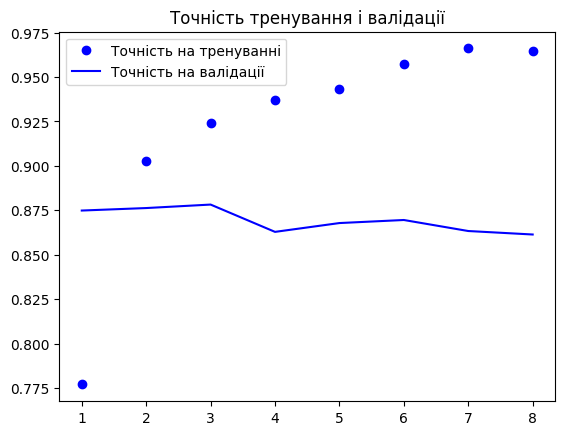

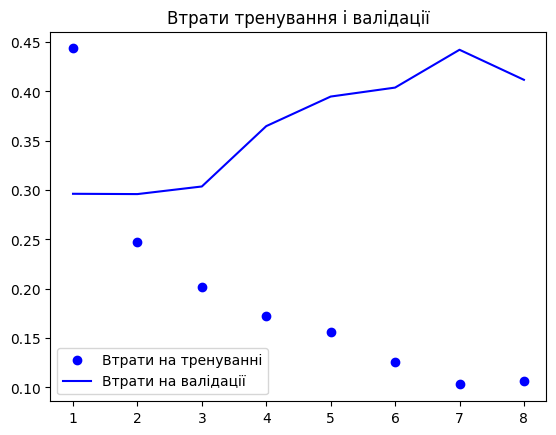

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [ ]:
def evaluate_model(model):
    loss, accuracy = model.evaluate(x_test, y_test)
    print("Test Accuracy:", accuracy)
    print("Test Loss:", loss)

print("Проста RNN:")
evaluate_model(model_rnn)

print("\nLSTM:")
evaluate_model(model_lstm)

print("\nBidirectional LSTM:")
evaluate_model(model_bid)

print("\nDeepBidirectional LSTM:")
evaluate_model(model_deepbid)

Проста RNN:
782/782 [==============================] - 18s 23ms/step - loss: 0.3898 - accuracy: 0.8470
Test Accuracy: 0.8470399975776672
Test Loss: 0.3897869288921356

LSTM:
782/782 [==============================] - 32s 41ms/step - loss: 0.2980 - accuracy: 0.8808
Test Accuracy: 0.8807600140571594
Test Loss: 0.2979878783226013

Bidirectional LSTM:
782/782 [==============================] - 54s 69ms/step - loss: 0.2915 - accuracy: 0.8814
Test Accuracy: 0.8813599944114685
Test Loss: 0.29147928953170776

DeepBidirectional LSTM:
782/782 [==============================] - 111s 142ms/step - loss: 0.3036 - accuracy: 0.8782
Test Accuracy: 0.8782399892807007
Test Loss: 0.3036244213581085


In [ ]:
predictions = model_rnn.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_bid.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 18s 23ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 53s 68ms/step - loss: 0.2915 - accuracy: 0.8814
Test Loss: 0.29147928953170776
Test Accuracy: 0.8813599944114685
